In [2]:
import pandas as pd 
import numpy as np

In [3]:
url=("https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/diabetes_1.csv")

In [4]:
dataset=pd.read_csv(url)

In [5]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
print(dataset.dtypes)
print(dataset.columns)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
X=dataset.drop('Outcome',axis=1)
y=dataset['Outcome']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
model=LogisticRegression()

In [15]:
model.fit(X_train,y_train)

c:\Users\rober\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
y_pred= model.predict(X_test)


In [18]:
accuracy= accuracy_score(y_test,y_pred)

In [19]:
accuracy

0.7142857142857143

In [20]:
conf_matrix=confusion_matrix(y_test,y_pred)

In [21]:
conf_matrix

array([[82, 18],
       [26, 28]], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
# see how model confusion matrix varies with threshold
bestmodel = model

#labels = y_test.sort_values().drop_duplicates().to_list()
labels = ['No Diabetics','Diabetics']

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (bestmodel.predict(X_test) is done automatically with a threshold of 0.5)
    y_pred = (bestmodel.predict_proba(X_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [6,6])
    sns.heatmap(conf, cmap='Blues', annot=True, square=True, cbar=False,
           xticklabels=labels,
           yticklabels=labels);
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show() # This is part that needs to be added to fix the issue

# Let's see how our confusion matrix changes with changes to the cutoff!
from ipywidgets import interactive, FloatSlider
interactive(lambda threshold: make_confusion_matrix(bestmodel, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [23]:
from sklearn.metrics import roc_curve, auc

In [24]:
roc_curves=roc_curve

In [27]:
fpr, tpr, threshold= roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

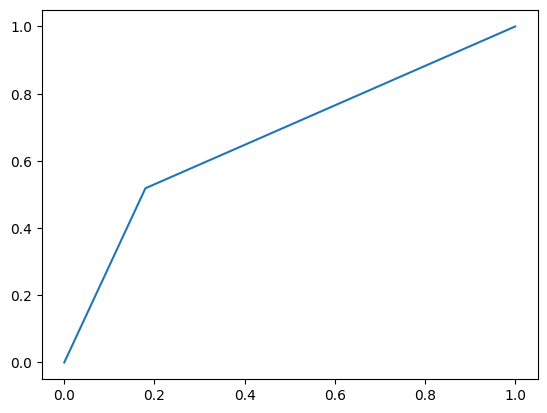

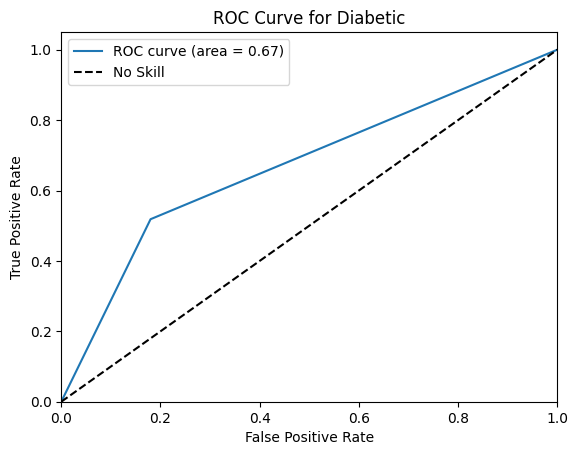

In [31]:
plt.figure()
plt.plot(fpr,tpr,label="Roc_curve(area=%0.2f)"%roc_auc)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetic')
plt.legend()
plt.show()

In [ ]:
import pickle

In [37]:
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Modello salvato con successo!")

Modello salvato con successo!


In [38]:
with open('logistic_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [39]:
y_pred = loaded_model.predict(X_test)
print("Previsioni:", y_pred)

Previsioni: [1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0]
